In [1]:

# Dependencies and Setup
import pandas as pd
import os
import matplotlib.pyplot as plt
import requests
from config import api_key
import random 
import numpy as np

# File to Load 
city_data_to_load = "Resources/worldcities.csv"

# Read world cities and their lat and long and put them into Panda dataframe
world_city_df = pd.read_csv(city_data_to_load)


# Create column and determine the hemisphere of each city 
world_city_df['Hemisphere'] = np.where(world_city_df['Latitude'] >= 0, 'N','S')

# set up additional columns to hold weather information
world_city_df['Processed'] = 'N'
world_city_df['Temperature (F)'] = 0
world_city_df['Humidity (%)'] = 0
world_city_df['Cloudiness (%)'] = 0
world_city_df['Wind Speed (mph)'] = 0

world_city_df

,Country,City,Latitude,Longitude,Hemisphere,Processed,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,ad,andorra la vella,42.500000,1.516667,N,N,0,0,0,0
1,ad,canillo,42.566667,1.600000,N,N,0,0,0,0
2,ad,encamp,42.533333,1.583333,N,N,0,0,0,0
3,ad,la massana,42.550000,1.516667,N,N,0,0,0,0
4,ad,les escaldes,42.500000,1.533333,N,N,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
46827,zw,redcliffe,-19.033333,29.783333,S,N,0,0,0,0
46828,zw,rusape,-18.533333,32.116667,S,N,0,0,0,0
46829,zw,shurugwi,-19.666667,30.000000,S,N,0,0,0,0
46830,zw,victoria falls,-17.933333,25.833333,S,N,0,0,0,0


In [2]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

i = 0
# We will process 600 records 
while (i < 600): 
    # Get a random number ranging from 0 to the total record from dataframe 
    n = random.randint(0,len(world_city_df)) 
    # Assign the cityname for that particular random row selected 
    cityName = world_city_df.iloc[n,world_city_df.columns.get_loc("City")]
    # Check to see if the city has already been processed with the weather API info 
    if world_city_df.iloc[n,world_city_df.columns.get_loc("Processed")] == "N":
        # Call the weather api with for the given city 
        response = requests.get(query_url + cityName).json()
        
        # Ensure the city is found from the weather api web site then assign those columns with values from the weather api site 
        if requests.head(query_url + cityName).status_code==200:
            print(f"City selected - Number = {n} and name is {cityName}")
            world_city_df.iloc[n,world_city_df.columns.get_loc('Temperature (F)')] = response['main']['temp']
            world_city_df.iloc[n,world_city_df.columns.get_loc('Humidity (%)')] = response['main']['humidity']
            world_city_df.iloc[n,world_city_df.columns.get_loc('Cloudiness (%)')] = response['clouds']['all']
            world_city_df.iloc[n,world_city_df.columns.get_loc('Wind Speed (mph)')] = response['wind']['speed']
            world_city_df.iloc[n,world_city_df.columns.get_loc("Processed")] = "Y"
            # Increment the count
            i = i + 1
        


 is la flecha
City selected - Number = 30992 and name is tangwani
City selected - Number = 10443 and name is karksi
City selected - Number = 32104 and name is almas
City selected - Number = 38830 and name is varnavino
City selected - Number = 43525 and name is pella
City selected - Number = 31253 and name is opole
City selected - Number = 13007 and name is torquay
City selected - Number = 42090 and name is sterling
City selected - Number = 7250 and name is rio viejo
City selected - Number = 14333 and name is vari
City selected - Number = 20817 and name is pozzallo
City selected - Number = 9296 and name is meschede
City selected - Number = 43704 and name is old orchard beach
City selected - Number = 6798 and name is cunday
City selected - Number = 23359 and name is amayuca
City selected - Number = 14069 and name is palaiomonastiron
City selected - Number = 6061 and name is jiangyou
City selected - Number = 46201 and name is las piedras
City selected - Number = 16467 and name is rajapola

IndexError: single positional indexer is out-of-bounds

Correlation coefficient=-0.7834841751860459 calculated between temperatures and latitudes of cities.
Linear regression Line formula is y = -0.88x + 77.96
As -0.7834841751860459 is between -0.5 to -1 which indicates a strong relationship between temperatures and the latitudes of the cities. This scatter plot has indicated higher temperature cities tend to located on lower latitudes coordinates of cities used in the sample data.


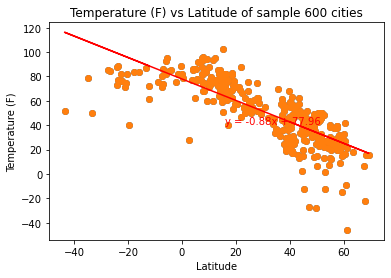

In [5]:
import scipy.stats as st
from scipy.stats import linregress
# Only want those processed 600 records
scatter = world_city_df.loc[world_city_df['Processed'] == "Y"]
x_values =  scatter["Latitude"]
y_values = scatter['Temperature (F)']
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15.8,41),fontsize=10,color="red")
plt.scatter(x_values,y_values)
print(f"Correlation coefficient={rvalue} calculated between temperatures and latitudes of cities.")
print(F"Linear regression Line formula is {line_eq}")
print(F"As {rvalue} is between -0.5 to -1 which indicates a strong relationship between temperatures and the latitudes of the cities. This scatter plot has indicated higher temperature cities tend to located on lower latitudes coordinates of cities used in the sample data.")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title('Temperature (F) vs Latitude of sample 600 cities')
plt.savefig("Images/Scatter-Temperature (F) vs Latitude of sample 600 cities.png")
plt.show()

Correlation coefficient=0.3554770369976761 calculated between Humidity (%) and latitudes of cities.
Linear regression Line formula is y = 0.34x + 61.81
As 0.3554770369976761 is below 0.5 which indicates a weak or no relationship between humidity percentage and the latitudes of the cities. This scatter plot has NOT provided any evidence or relationship between humidity percentage and latitudes of those cities used in the sample data.


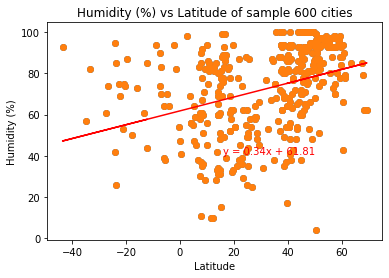

In [6]:
x_values = scatter["Latitude"]
y_values = scatter['Humidity (%)']
 
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15.8,41),fontsize=10,color="red")
plt.scatter(x_values,y_values)
print(f"Correlation coefficient={rvalue} calculated between Humidity (%) and latitudes of cities.")
print(F"Linear regression Line formula is {line_eq}")
print(F"As {rvalue} is below 0.5 which indicates a weak or no relationship between humidity percentage and the latitudes of the cities. This scatter plot has NOT provided any evidence or relationship between humidity percentage and latitudes of those cities used in the sample data.")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title('Humidity (%) vs Latitude of sample 600 cities')
plt.savefig("Images/Humidity (%) vs Latitude of sample 600 cities.png")
plt.show()

Correlation coefficient=0.12420687391040777 calculated between Cloudiness (%) and latitudes of cities.
Linear regression Line formula is y = 0.21x + 51.22
As 0.12420687391040777 is below 0.5 which indicates a weak or no relationship between cloudiness percentage and the latitudes of the cities. This scatter plot has NOT provided any evidence or replationship between cloudiness percentage and latitudes of those cities used in the sample data.


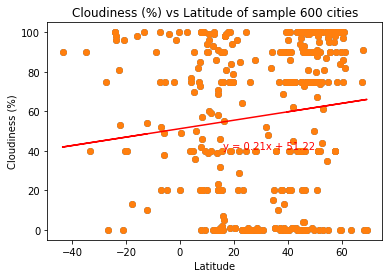

In [7]:
x_values =  scatter["Latitude"]
y_values = scatter['Cloudiness (%)']
 
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15.8,41),fontsize=10,color="red")
plt.scatter(x_values,y_values)
print(f"Correlation coefficient={rvalue} calculated between Cloudiness (%) and latitudes of cities.")
print(F"Linear regression Line formula is {line_eq}")
print(F"As {rvalue} is below 0.5 which indicates a weak or no relationship between cloudiness percentage and the latitudes of the cities. This scatter plot has NOT provided any evidence or replationship between cloudiness percentage and latitudes of those cities used in the sample data.")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title('Cloudiness (%) vs Latitude of sample 600 cities')
plt.savefig("Images/Cloudiness (%) vs Latitude of sample 600 cities.png")
plt.show()

Correlation coefficient=0.1896732848261642 calculated between Wind Speed and latitudes of cities.
Linear regression Line formula is y = 0.05x + 6.38
As 0.1896732848261642 is very close to 0 which indicates a weak or no relationship between wind speed and the latitudes of the cities. This scatter plot has NOT provided any evidence or replationship between wind speed and latitudes of those cities used in the sample data.


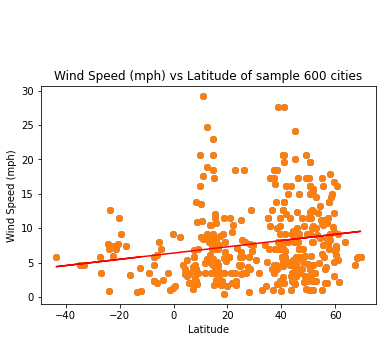

In [8]:
x_values =  scatter["Latitude"]
y_values  = scatter['Wind Speed (mph)']
 
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15.8,41),fontsize=10,color="red")
plt.scatter(x_values,y_values)
print(f"Correlation coefficient={rvalue} calculated between Wind Speed and latitudes of cities.")
print(F"Linear regression Line formula is {line_eq}")
print(F"As {rvalue} is very close to 0 which indicates a weak or no relationship between wind speed and the latitudes of the cities. This scatter plot has NOT provided any evidence or replationship between wind speed and latitudes of those cities used in the sample data.")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title('Wind Speed (mph) vs Latitude of sample 600 cities')
plt.savefig("Images/Wind speed (mph) vs Latitude of sample 600 cities.png")
plt.show()

In [9]:
# Need to divide between Northern and Southern hemisphere cities into different datafreame for further evalution
# More Northern cities than south 
scatterSouth = scatter.loc[scatter['Hemisphere'] == "S"]
scatterNorth = scatter.loc[scatter['Hemisphere'] == "N"]
len(scatterSouth.index)
len(scatterNorth.index)


357

In [10]:
x_values =  scatterNorth["Latitude"]
y_values = scatterNorth['Temperature (F)']
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.scatter(x_values,y_values)
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(15.8,41),fontsize=10,color="red")
#plt.scatter(x_values,y_values)
print(f"Correlation coefficient={rvalue} calculated between temperatures and latitudes of Northern Hemisphere cities.")
print(F"Linear regression Line formula is {line_eq}")
print(F"As {rvalue} is between -0.5 to -1 which indicates a strong relationship between temperatures and the latitudes of Northern Hemisphere cities. This scatter plot has indicated higher temperature cities tend to located on lower latitudes coordinates of cities used in the sample data.")
#plt.xlabel("Latitude")
#plt.ylabel("Temperature (F)")
#plt.title('Temperature (F) vs Latitute of Northern Hemisphere cities')
#plt.savefig("Images/Temoperature (F) vs Latitute of sample 600 cities.png")
#plt.show()

Correlation coefficient=-0.8252264775068917 calculated between temperatures and latitudes of Northern Hemisphere cities.
Linear regression Line formula is y = -1.16x + 89.06
As -0.8252264775068917 is between -0.5 to -1 which indicates a strong relationship between temperatures and the latitudes of Northern Hemisphere cities. This scatter plot has indicated higher temperature cities tend to located on lower latitudes coordinates of cities used in the sample data.


In [11]:
x_values =  scatterSouth["Latitude"]
y_values = scatterSouth['Temperature (F)']
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.scatter(x_values,y_values)
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(15.8,41),fontsize=10,color="red")
#plt.scatter(x_values,y_values)
print(f"Correlation coefficient={rvalue} calculated between temperatures and latitudes of Southern Hemisphere cities.")
print(F"Linear regression Line formula is {line_eq}")
print(F"As {rvalue} is between 0 and -0.5 which indicates a weak or no relationship between temperatures and the latitudes of Southern Hemisphere cities. That might be because of the lack and the limited number of southern hemisphere cities found. Anyhow, this scatter plot has NOT provided any evidence or relationship between temperature and latitude of cities used in the sample data.")
#plt.xlabel("Latitude")
#plt.ylabel("Temperature (F)")
#plt.title('Temperature (F) vs Latitute of Southern Hemisphere cities')
#plt.show()

Correlation coefficient=0.4139143634178141 calculated between temperatures and latitudes of Southern Hemisphere cities.
Linear regression Line formula is y = 0.45x + 84.8
As 0.4139143634178141 is between 0 and -0.5 which indicates a weak or no relationship between temperatures and the latitudes of Southern Hemisphere cities. That might be because of the lack and the limited number of southern hemisphere cities found. Anyhow, this scatter plot has NOT provided any evidence or relationship between temperature and latitude of cities used in the sample data.


Correlation coefficient=0.44890020393527896 calculated between temperatures and latitudes of Northern Hemisphere cities.
Linear regression Line formula is y = 0.55x + 53.19
As 0.44890020393527896 is between 0 and -0.5 which indicates a weak or no relationship between humidity percentage and the latitudes of Northern Hemisphere cities. This scatter plot has NOT provided any evidence or relationship between humidity percentage and latitudes of those cities used in the sample data.


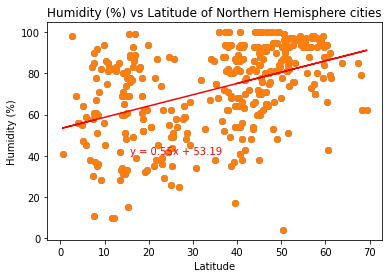

In [12]:
x_values =  scatterNorth["Latitude"]
y_values = scatterNorth['Humidity (%)']
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15.8,41),fontsize=10,color="red")
plt.scatter(x_values,y_values)
print(f"Correlation coefficient={rvalue} calculated between temperatures and latitudes of Northern Hemisphere cities.")
print(F"Linear regression Line formula is {line_eq}")
print(F"As {rvalue} is between 0 and -0.5 which indicates a weak or no relationship between humidity percentage and the latitudes of Northern Hemisphere cities. This scatter plot has NOT provided any evidence or relationship between humidity percentage and latitudes of those cities used in the sample data.")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title('Humidity (%) vs Latitude of Northern Hemisphere cities')
plt.show()

In [13]:
x_values =  scatterSouth["Latitude"]
y_values = scatterSouth['Humidity (%)']
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.scatter(x_values,y_values)
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(15.8,41),fontsize=10,color="red")
#plt.scatter(x_values,y_values)
print(f"Correlation coefficient={rvalue} calculated between temperatures and latitudes of Southern Hemisphere cities.")
print(F"Linear regression Line formula is {line_eq}")
print(F"As {rvalue} is between 0 and -0.5 which indicates a weak or no relationship between humidity percentage and the latitudes of Southern Hemisphere cities. This scatter plot has NOT provided any evidence or relationship between humidity percentage and latitudes of those cities used in the sample data.")
#plt.xlabel("Latitude")
#plt.ylabel("Humidity (%)")
#plt.title('Humidity (%) vs Latitute of Southern Hemisphere cities')
#plt.show()

Correlation coefficient=-0.11050474384795879 calculated between temperatures and latitudes of Southern Hemisphere cities.
Linear regression Line formula is y = -0.19x + 65.47
As -0.11050474384795879 is between 0 and -0.5 which indicates a weak or no relationship between humidity percentage and the latitudes of Southern Hemisphere cities. This scatter plot has NOT provided any evidence or relationship between humidity percentage and latitudes of those cities used in the sample data.


In [14]:
x_values =  scatterNorth["Latitude"]
y_values = scatterNorth['Cloudiness (%)']
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.scatter(x_values,y_values)
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(15.8,41),fontsize=10,color="red")
#plt.scatter(x_values,y_values)
print(f"Correlation coefficient={rvalue} calculated between Cloudiness (%) and latitudes of Northern Hemisphere cities.")
print(F"Linear regression Line formula is {line_eq}")
print(F"As {rvalue} is betweenn 0 and -0.5 which indicates a weak or no relationship between Cloudiness percentage and the latitudes of Northern Hemisphere cities. This scatter plot has NOT provided any evidence or relationship between Cloudiness percentage and latitudes of those cities used in the sample data.")
#plt.xlabel("Latitude")
#plt.ylabel("Cloudiness (%)")
#plt.title('Cloudiness (%) vs Latitute of Northern Hemisphere cities')
#plt.show()

Correlation coefficient=0.22410589876772 calculated between Cloudiness (%) and latitudes of Northern Hemisphere cities.
Linear regression Line formula is y = 0.5x + 39.67
As 0.22410589876772 is betweenn 0 and -0.5 which indicates a weak or no relationship between Cloudiness percentage and the latitudes of Northern Hemisphere cities. This scatter plot has NOT provided any evidence or relationship between Cloudiness percentage and latitudes of those cities used in the sample data.


Correlation coefficient=-0.06910700992719106 calculated between Cloudiness (%) and latitudes of Southern Hemisphere cities.
Linear regression Line formula is y = -0.22x + 60.86
As -0.06910700992719106 is between 0 and -0.5 which indicates a weak or no relationship between Cloudiness percentage and the latitudes of Southern Hemisphere cities. This scatter plot has NOT provided any evidence or relationship between Cloudiness percentage and latitudes of those cities used in the sample data.


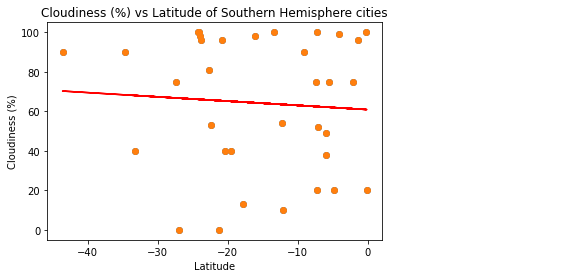

In [15]:
x_values =  scatterSouth["Latitude"]
y_values = scatterSouth['Cloudiness (%)']
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15.8,41),fontsize=10,color="red")
plt.scatter(x_values,y_values)
print(f"Correlation coefficient={rvalue} calculated between Cloudiness (%) and latitudes of Southern Hemisphere cities.")
print(F"Linear regression Line formula is {line_eq}")
print(F"As {rvalue} is between 0 and -0.5 which indicates a weak or no relationship between Cloudiness percentage and the latitudes of Southern Hemisphere cities. This scatter plot has NOT provided any evidence or relationship between Cloudiness percentage and latitudes of those cities used in the sample data.")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title('Cloudiness (%) vs Latitude of Southern Hemisphere cities')
plt.show()

In [16]:
x_values =  scatterNorth["Latitude"]
y_values = scatterNorth['Wind Speed (mph)']
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.scatter(x_values,y_values)
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(15.8,41),fontsize=10,color="red")
#plt.scatter(x_values,y_values)
print(f"Correlation coefficient={rvalue} calculated between Wind Speed (mph) and latitudes of Northern Hemisphere cities.")
print(F"Linear regression Line formula is {line_eq}")
print(F"As {rvalue} is betweenn 0 and -0.5 which indicates a weak or no relationship between Wind Speed (mph) and the latitudes of Northern Hemisphere cities. This scatter plot has NOT provided any evidence or relationship between Wind Speed (mph) percentage and latitudes of those cities used in the sample data.")
#plt.xlabel("Latitude")
#plt.ylabel("Wind Speed (mph)")
#plt.title('Wind Speed (mph) vs Latitute of Northern Hemisphere cities')
#plt.show()

Correlation coefficient=0.13447924028345626 calculated between Wind Speed (mph) and latitudes of Northern Hemisphere cities.
Linear regression Line formula is y = 0.04x + 6.54
As 0.13447924028345626 is betweenn 0 and -0.5 which indicates a weak or no relationship between Wind Speed (mph) and the latitudes of Northern Hemisphere cities. This scatter plot has NOT provided any evidence or relationship between Wind Speed (mph) percentage and latitudes of those cities used in the sample data.


In [17]:
x_values =  scatterSouth["Latitude"]
y_values = scatterSouth['Wind Speed (mph)']
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.scatter(x_values,y_values)
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(15.8,41),fontsize=10,color="red")
#plt.scatter(x_values,y_values)
print(f"Correlation coefficient={rvalue} calculated between Wind Speed (mph) and latitudes of Southern Hemisphere cities.")
print(F"Linear regression Line formula is {line_eq}")
print(F"As {rvalue} is betweenn 0 and -0.5 which indicates a weak or no relationship between Wind Speed (mph) and the latitudes of Southern Hemisphere cities. This scatter plot has NOT provided any evidence or relationship between Wind Speed (mph) percentage and latitudes of those cities used in the sample data.")
#plt.xlabel("Latitude")
#plt.ylabel("Wind Speed (mph)")
#plt.title('Wind Speed (mph) vs Latitute of Southern Hemisphere cities')
#plt.show()

Correlation coefficient=-0.28272019526833964 calculated between Wind Speed (mph) and latitudes of Southern Hemisphere cities.
Linear regression Line formula is y = -0.08x + 3.95
As -0.28272019526833964 is betweenn 0 and -0.5 which indicates a weak or no relationship between Wind Speed (mph) and the latitudes of Southern Hemisphere cities. This scatter plot has NOT provided any evidence or relationship between Wind Speed (mph) percentage and latitudes of those cities used in the sample data.


In [19]:
# Because we are only taken the temperature, humidity, cloudines and wind speed at one instance of those cities hence the accuracy of data might not be that reliable. It would be better if we can take a reading of those cities and continue for a pdriod of a month or two and then calculate the mean of those values and plot them using the scatter plots would, I think, provide a more accurate statistical output than our current one.    

scatter.to_csv('Resources/cityWeatherResult.csv', index=False)